# How many Data Analyst job postings offer remote work options, and how does the average salary compare between remote and non-remote positions?

In [20]:
# Importing the needed libraries

import pandas as pd
import plotly.express as px
from IPython.display import Image

%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
# Load the data
data_loaded = pd.read_csv(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Python_Data_Analyst_Job_Postings_Analysis_2023\Data\data_jobs.csv')

# Filter Data for Data Analyst Jobs listed in the United States
df_USA = data_loaded[(data_loaded['job_country'] == 'United States') &
                     (data_loaded['job_title_short'] == 'Data Analyst')].copy()

# From the info viewed, the job_posted_date column is showed as an object(str)
# We will transform the date column to have datetime as a data type

df_USA['job_posted_date'] = pd.to_datetime(df_USA['job_posted_date'])

# Adding a month column to the data
df_USA['job_posted_month'] = df_USA['job_posted_date'].dt.month_name()
df_USA['job_posted_day'] = df_USA['job_posted_date'].dt.day_name()

df_USA_cleaned = df_USA.dropna(subset=['salary_year_avg']).reset_index().drop('index', axis =1)

# View the head of the data
print('Shape of the data:',(df_USA_cleaned.shape))
df_USA_cleaned.head()

Shape of the data: (4350, 19)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_day
0,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",October,Thursday
1,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"['excel', 'powerpoint']","{'analyst_tools': ['excel', 'powerpoint']}",February,Monday
2,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"['sql', 'word', 'excel', 'visio', 'powerpoint'...","{'analyst_tools': ['word', 'excel', 'visio', '...",January,Tuesday
3,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"['sql', 'excel', 'tableau']","{'analyst_tools': ['excel', 'tableau'], 'progr...",November,Tuesday
4,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"['sql', 'excel', 'power bi']","{'analyst_tools': ['excel', 'power bi'], 'prog...",October,Tuesday


In [11]:
df_USA_cleaned[['job_work_from_home']].value_counts()

job_work_from_home
False                 3782
True                   568
Name: count, dtype: int64

In [12]:
# Extracting the data on Remote Jobs and aggregating to have the count and the median salary

df_work_home_True = df_USA_cleaned[df_USA_cleaned['job_work_from_home'] == True]

df_work_home_True = df_work_home_True[['job_schedule_type','salary_year_avg']]

df_work_home_True = df_work_home_True.groupby('job_schedule_type').agg(
    count = ('job_schedule_type', 'size'),
    salary_year_avg = ('salary_year_avg', 'mean')).sort_values(by ='count',ascending=False)

df_work_home_True

,count,salary_year_avg
job_schedule_type,,
Full-time,541,93977.073576
Contractor,15,99800.000000
Full-time and Contractor,5,70700.000000
Full-time and Part-time,2,131860.750000
Part-time,2,82850.000000
Full-time and Internship,1,71000.000000
Full-time and Temp work,1,80740.000000


In [13]:
# Extracting the data on Non-Remote Jobs and aggregating to have the count and the median salary

df_work_home_False = df_USA_cleaned[df_USA_cleaned['job_work_from_home'] == False]

df_work_home_False = df_work_home_False[['job_schedule_type','salary_year_avg']]

df_work_home_False = df_work_home_False.groupby('job_schedule_type').agg(
    count = ('job_schedule_type', 'size'),
    salary_year_avg = ('salary_year_avg', 'mean')).sort_values(by = 'count',ascending=False)

df_work_home_False

,count,salary_year_avg
job_schedule_type,,
Full-time,3556,95239.207223
Contractor,96,85031.446696
Full-time and Part-time,51,99701.098805
Part-time,21,74235.952381
Full-time and Contractor,15,81789.993750
Temp work,8,70000.000000
Full-time and Temp work,6,79035.166667
Internship,6,68333.333333
Contractor and Temp work,4,78750.000000


In [14]:
# Sorting the data by the Salary_Year_Avg column
df_work_home_True = df_work_home_True.sort_values(by = 'salary_year_avg', ascending=False)
df_work_home_False = df_work_home_False.sort_values(by = 'salary_year_avg', ascending=False)

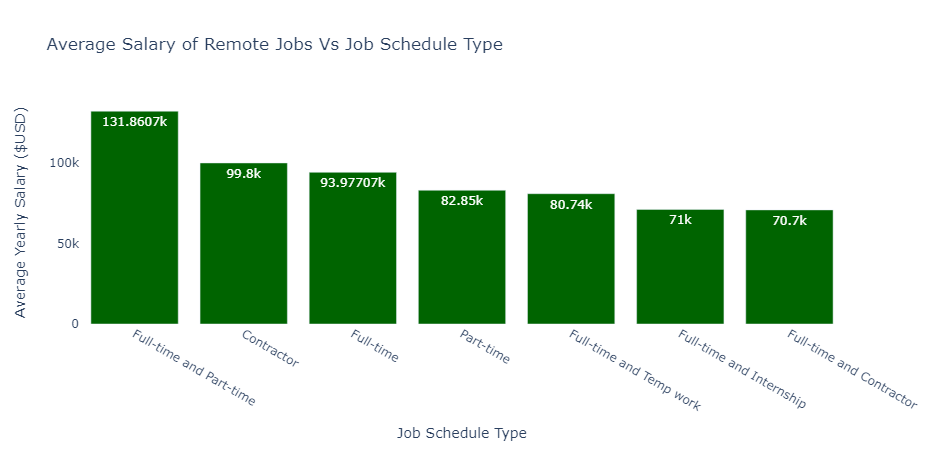

In [28]:
# Creating a bar chart for the Remote Jobs by their avearge salaries

data_list = [df_work_home_True, df_work_home_False]
data_title = ['Average Salary of Non-Remote Jobs Vs Job Schedule Type']
 
fig = px.bar(data_frame = df_work_home_True, x =df_work_home_True.index, y = 'salary_year_avg',
             color_discrete_sequence= ['darkgreen'], labels= {'job_schedule_type':'Job Schedule Type',
                                                              'salary_year_avg':'Average Yearly Salary ($USD)'},
             title =  'Average Salary of Remote Jobs Vs Job Schedule Type',
             text_auto=True)

fig.update_layout(plot_bgcolor = '#ffffff', paper_bgcolor = '#ffffff')
    
# fig.show()

Image(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Python_Data_Analyst_Job_Postings_Analysis_2023\Images\Remote_Jobs_Avg.png')



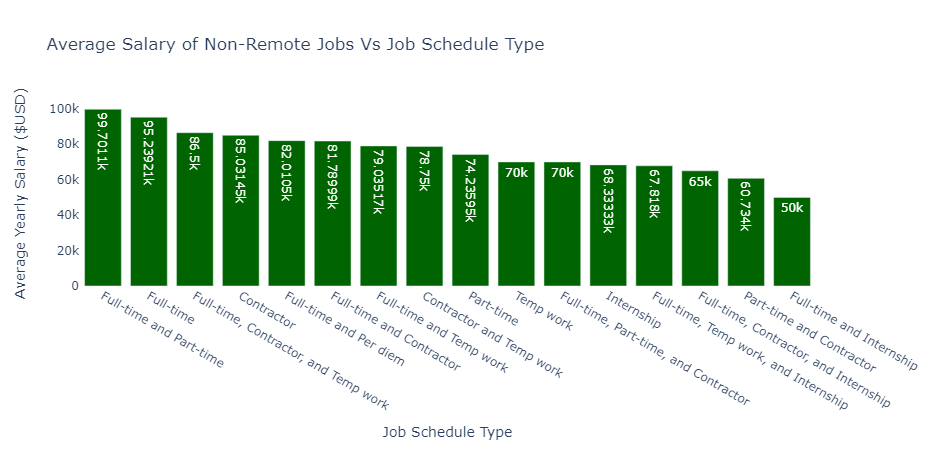

In [27]:
# Creating a bar chart for the Non-Remote Jobs by their avearge salaries

fig = px.bar(data_frame = df_work_home_False, x =df_work_home_False.index, y = 'salary_year_avg',
             color_discrete_sequence= ['darkgreen'], labels= {'job_schedule_type':'Job Schedule Type',
                                                              'salary_year_avg':'Average Yearly Salary ($USD)'},
             title =  'Average Salary of Non-Remote Jobs Vs Job Schedule Type',
             text_auto=True)

fig.update_layout(plot_bgcolor = '#ffffff', paper_bgcolor = '#ffffff')
    
#fig.show()

Image(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Python_Data_Analyst_Job_Postings_Analysis_2023\Images\Non-Remote_Jobs_Avg.png')

